<a href="https://colab.research.google.com/github/andres-merino/AprendizajeAutomaticoInicial-05-N0105/blob/main/2-Ejercicios/06-SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table style="border: none; border-collapse: collapse;">
    <tr>
        <td style="width: 20%; vertical-align: middle; padding-right: 10px;">
            <img src="https://i.imgur.com/nt7hloA.png" width="100">
        </td>
        <td style="width: 2px; text-align: center;">
            <font color="#0030A1" size="7">|</font><br>
            <font color="#0030A1" size="7">|</font>
        </td>
        <td>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="5">
                <b>Facultad de Ciencias Exactas, Naturales y Ambientales</b>
            </font> </p>
            <p style="font-variant: small-caps;"><font color="#0030A1" size="4">
                Aprendizaje Automático Inicial &bull; Máquinas de soporte vectorial
            </font></p>
            <p style="font-style: oblique;"><font color="#0030A1" size="3">
                Emilio Andrade &bull; 2026-04-01
            </font></p>
        </td>  
    </tr>
</table>

---
## <font color='264CC7'> Introducción </font>

A lo largo de este taller, aplicaremos el algoritmo de máquinas de soporte vectorial (SVM) para clasificar un conjunto de datos.

Los paquetes necesarios son:

In [15]:
# Paquetes necesarios
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

---
## <font color='264CC7'> Clasificación </font>


### <font color='264CC7'> Preprocesamiento de datos </font>

Primero necesitas el conjunto de datos. Los datos a utilzar son los seleccionados en la clase anterior.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Carga el conjunto de datos y procésalos:
<ul>
  <li>Muestra algunos datos.</li>
  <li>Muestra una descripción de los datos.</li>
  <li>Escala los datos si es necesario.</li>
</ul>
</div>

In [16]:
url = "https://raw.githubusercontent.com/1EmilioAnd1/CD-Andrade-Emilio/refs/heads/main/synthetic_ecommerce_churn_dataset.csv"
df = pd.read_csv(url)

display(df.head())

print("Shape:", df.shape)
display(df.describe(include="all"))

num_cols = ["age","avg_order_value","total_orders","last_purchase","email_open_rate","loyalty_score","churn_risk"]

X_num = df[num_cols].copy()
X_num = X_num.fillna(X_num.median(numeric_only=True))

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)

df_scaled = pd.DataFrame(X_scaled, columns=num_cols)
display(df_scaled.head())

display(df["is_fraudulent"].value_counts())
display(df["is_fraudulent"].value_counts(normalize=True))

,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
0,CUST_8270,30,Female,Brazil,101.08,8,176,1,Beauty,25.6,2024-06-05,50,0.20
1,CUST_1860,53,Female,USA,90.39,10,88,0,Electronics,12.3,2024-02-19,37,0.34
2,CUST_6390,73,Male,Australia,83.28,6,203,0,Sports,NaN,2024-04-16,65,0.05
3,CUST_6191,30,Other,Japan,109.90,9,346,1,Electronics,42.9,2020-07-08,93,0.19
4,CUST_6734,29,Female,Canada,269.38,16,342,0,Fashion,5.3,2025-04-09,79,0.15


Shape: (5000, 13)


,customer_id,age,gender,country,avg_order_value,total_orders,last_purchase,is_fraudulent,preferred_category,email_open_rate,customer_since,loyalty_score,churn_risk
count,5000,5000.000000,5000,5000,4750.000000,5000.000000,5000.000000,5000.000000,5000,4750.000000,5000,5000.000000,5000.000000
unique,3809,NaN,3,10,NaN,NaN,NaN,NaN,5,NaN,1701,NaN,NaN
top,CUST_5780,NaN,Male,Australia,NaN,NaN,NaN,NaN,Beauty,NaN,2020-12-22,NaN,NaN
freq,6,NaN,2278,518,NaN,NaN,NaN,NaN,1035,NaN,11,NaN,NaN
mean,NaN,48.163200,NaN,NaN,108.442857,10.027000,180.073200,0.025800,NaN,50.714842,NaN,50.039400,0.284484
std,NaN,17.880797,NaN,NaN,69.265559,3.163838,104.926518,0.158554,NaN,29.098706,NaN,28.832151,0.159690
min,NaN,18.000000,NaN,NaN,10.660000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,1.000000,0.000000
25%,NaN,33.000000,NaN,NaN,57.805000,8.000000,89.000000,0.000000,NaN,25.225000,NaN,25.000000,0.160000
50%,NaN,48.000000,NaN,NaN,93.190000,10.000000,178.000000,0.000000,NaN,50.950000,NaN,50.000000,0.260000
75%,NaN,64.000000,NaN,NaN,142.197500,12.000000,270.000000,0.000000,NaN,76.800000,NaN,75.000000,0.390000


,age,avg_order_value,total_orders,last_purchase,email_open_rate,loyalty_score,churn_risk
0,-1.015895,-0.097656,-0.640742,-0.038823,-0.886019,-0.001367,-0.529103
1,0.270530,-0.255824,-0.008535,-0.877589,-1.355007,-0.452297,0.347683
2,1.389160,-0.361022,-1.272948,0.218525,0.007878,0.518938,-1.468516
3,-1.015895,0.032844,-0.324638,1.581520,-0.275983,1.490173,-0.591730
4,-1.071827,2.392490,1.888086,1.543394,-1.601842,1.004556,-0.842241


,count
is_fraudulent,
0,4871
1,129


,proportion
is_fraudulent,
0,0.9742
1,0.0258


En este apartado se carga el conjunto de datos desde el enlace en formato raw, así el análisis queda repetible y todos trabajamos con la misma fuente, luego se usa `describe(include="all")` para tener una vista general de las variables y detectar faltantes, aquí se observa que `avg_order_value` y `email_open_rate` no tienen el conteo completo, por eso se imputan con la mediana.

Después se estandarizan las variables numéricas con `StandardScaler`, este paso es importante en SVM porque el modelo se apoya en distancias y márgenes, si una variable tiene una escala mucho mayor puede dominar el ajuste y mover la frontera de decisión, al escalar se busca que las variables numéricas aporten de forma más pareja, y que el modelo sea más estable.

Finalmente se revisa la variable objetivo `is_fraudulent` con conteos y proporciones, se nota un desbalance claro, la clase 1 es pequeña, entonces más adelante la accuracy sola puede engañar, por eso se complementará con matriz de confusión y el reporte de clasificación, para ver si el modelo realmente detecta fraude o solo predice no fraude.


### <font color='264CC7'> Determinación del mejor kernel </font>

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Determina el mejor kernel para el modelo SVM.
<ul>
  <li>Genera una gráfica que muestre la precisión de los modelos con diferentes kernels.</li>
  <li>Selecciona el mejor kernel.</li>
</ul>
</div>


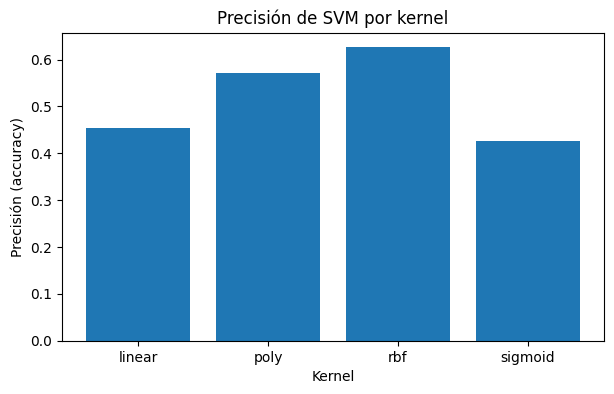

Mejor kernel: rbf
Mejor precisión: 0.626


In [17]:
num_cols = ["age","avg_order_value","total_orders","last_purchase","email_open_rate","loyalty_score","churn_risk"]

X_raw = df[num_cols].copy()
y = df["is_fraudulent"].values

X_train_raw, X_test_raw, y_train, y_test = train_test_split(
    X_raw, y, test_size=0.2, random_state=42, stratify=y
)

X_train_raw = X_train_raw.fillna(X_train_raw.median(numeric_only=True))
X_test_raw = X_test_raw.fillna(X_train_raw.median(numeric_only=True))

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_raw)
X_test = scaler.transform(X_test_raw)

kernel_values = ["linear", "poly", "rbf", "sigmoid"]
accuracies = []

for k in kernel_values:
    modelo = SVC(kernel=k, class_weight="balanced")
    modelo.fit(X_train, y_train)
    y_pred = modelo.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(7, 4))
plt.bar(kernel_values, accuracies)
plt.xlabel("Kernel")
plt.ylabel("Precisión (accuracy)")
plt.title("Precisión de SVM por kernel")
plt.show()

best_idx = int(pd.Series(accuracies).idxmax())
best_kernel = kernel_values[best_idx]

print("Mejor kernel:", best_kernel)
print("Mejor precisión:", round(max(accuracies), 4))

En esta sección se comparan distintos kernels del modelo SVM para escoger el que mejor se adapta a los datos, primero se separa el conjunto en entrenamiento y prueba con estratificación, esto ayuda a mantener una proporción similar de fraudes en ambos grupos, luego se imputan valores faltantes con la mediana del entrenamiento y se estandarizan las variables numéricas, este paso es necesario porque SVM es sensible a la escala y trabaja con distancias.

Después se entrena un SVM para cada kernel considerado, `linear`, `poly`, `rbf` y `sigmoid`, y se calcula la precisión en el conjunto de prueba, con estos valores se construye una gráfica de barras para comparar de forma directa el desempeño de cada opción, finalmente se selecciona como mejor kernel aquel que obtiene la mayor precisión, en este caso el kernel `rbf` fue el que mostró el mejor resultado en test bajo este criterio.


### <font color='264CC7'> Entrenamiento del modelo y evaluación </font>


<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Entrena el modelo y evalúalo:
<ul>
  <li>Entrena el modelo con el kernel seleccionado.</li>
  <li>Evalúa el modelo con el conjunto de datos de prueba.</li>
  <li>Genera una matriz de confusión y muestra las métricas de evaluación.</li>
</ul>
</div>

In [18]:
modelo_final = SVC(kernel=best_kernel, class_weight="balanced")
modelo_final.fit(X_train, y_train)

y_pred = modelo_final.predict(X_test)

print("Kernel seleccionado:", best_kernel)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nMatriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("\nReporte de clasificación:\n", classification_report(y_test, y_pred, digits=4))

Kernel seleccionado: rbf
Accuracy: 0.626

Matriz de confusión:
 [[618 356]
 [ 18   8]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0     0.9717    0.6345    0.7677       974
           1     0.0220    0.3077    0.0410        26

    accuracy                         0.6260      1000
   macro avg     0.4968    0.4711    0.4044      1000
weighted avg     0.9470    0.6260    0.7488      1000



En esta etapa se entrena el modelo SVM usando el kernel seleccionado en la comparación anterior, en este caso `rbf`, el ajuste se realiza con los datos de entrenamiento ya escalados, y luego se evalúa con el conjunto de prueba para medir qué tan bien generaliza.

La matriz de confusión resume los aciertos y errores del clasificador, separando los casos de no fraude y fraude, además se presenta el reporte de clasificación con precisión, recall y f1 score por clase, esto es importante porque la base está desbalanceada y la accuracy por sí sola no cuenta toda la historia, por ejemplo se observa que el modelo logra recuperar una parte de los casos de fraude, pero también genera varios falsos positivos, por eso estas métricas complementarias ayudan a interpretar mejor el resultado final.

<div style="background-color: #edf1f8; border-color: #264CC7; border-left: 5px solid #264CC7; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
    Compara el modelo con otros algoritmos de clasificación vistos en clases anteriores.
</div>

,modelo,accuracy,precision_fraude,recall_fraude,f1_fraude
1,LogReg,0.502,0.026104,0.500000,0.049618
0,SVM_rbf,0.626,0.021978,0.307692,0.041026
3,Arbol,0.948,0.035714,0.038462,0.037037
2,KNN,0.974,0.000000,0.000000,0.000000
4,RandomForest,0.974,0.000000,0.000000,0.000000
5,NaiveBayes,0.974,0.000000,0.000000,0.000000


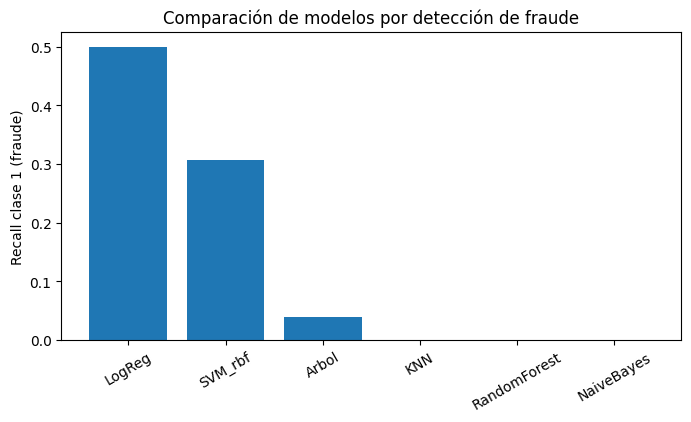

In [19]:
modelos = {
    "SVM_rbf": SVC(kernel="rbf", class_weight="balanced"),
    "LogReg": LogisticRegression(max_iter=2000, class_weight="balanced", random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "Arbol": DecisionTreeClassifier(class_weight="balanced", random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=300, class_weight="balanced", random_state=42),
    "NaiveBayes": GaussianNB()
}

resultados = []

for nombre, modelo in modelos.items():
    modelo.fit(X_train, y_train)
    pred = modelo.predict(X_test)

    acc = accuracy_score(y_test, pred)
    rep = classification_report(y_test, pred, output_dict=True, zero_division=0)

    resultados.append({
        "modelo": nombre,
        "accuracy": acc,
        "precision_fraude": rep["1"]["precision"],
        "recall_fraude": rep["1"]["recall"],
        "f1_fraude": rep["1"]["f1-score"]
    })

res_df = pd.DataFrame(resultados).sort_values("recall_fraude", ascending=False)
display(res_df)

plt.figure(figsize=(8, 4))
plt.bar(res_df["modelo"], res_df["recall_fraude"])
plt.xticks(rotation=30)
plt.ylabel("Recall clase 1 (fraude)")
plt.title("Comparación de modelos por detección de fraude")
plt.show()

En este ejercicio se comparó el SVM con otros algoritmos de clasificación vistos en clases anteriores, usando el mismo conjunto de entrenamiento y prueba, y trabajando con el dataset sintético de e commerce que incluye variables demográficas, transaccionales y de comportamiento, como edad, país, valor promedio de orden, recencia de compra, tasa de apertura de emails, puntaje de lealtad y un indicador de historial fraudulento, por el desbalance fuerte de la variable objetivo la accuracy sola puede ser engañosa, así que se reportó también precisión, recall y f1 para complementar la evaluación.

Los resultados muestran un patrón claro, modelos como KNN, RandomForest y Naive Bayes alcanzan una accuracy alta, pero no llegan a identificar casos de la clase minoritaria, en la práctica esto significa que casi siempre predicen la clase mayoritaria, y por eso el modelo no es útil si lo que se busca es detectar positivos, el árbol de decisión mejora un poco pero todavía recupera muy pocos casos.

En cambio, LogReg y SVM con kernel rbf si logran identificar parte de los casos positivos, LogReg obtiene el mayor recall, pero a costo de muchos falsos positivos y una accuracy baja, SVM rbf mantiene una accuracy mayor, aunque su recall es menor, en conjunto estos resultados sugieren que para esta base el objetivo no es solo maximizar accuracy, sino balancear la detección de casos positivos con el nivel de falsas alertas, y por eso el análisis por clase resulta más útil que una métrica global.

A nivel profesional esto se conecta con decisiones reales en e commerce, por ejemplo si se usa para marcar clientes con historial fraudulento, un modelo con demasiados falsos positivos puede bloquear compras legítimas o generar fricción con clientes, mientras que un modelo que no detecta positivos deja pasar transacciones riesgosas, por eso antes de desplegarlo se tendría que definir el costo de cada error, y ajustar el modelo con ese criterio, además esta misma base también permite extender el trabajo a otros objetivos como churn o segmentación, pero siempre cuidando que la métrica elegida refleje el problema real y no solo una accuracy alta.